In [3]:
## Step #1: Load the necessary libraries 

import pandas as pd # pandas for data manipulation / analysis / dataframes
import numpy as np # numerical operations 
import matplotlib.pyplot as plt # data visualizations 
import seaborn as sns # data visualizations 
from sklearn.model_selection import train_test_split # to split the dataset into training/ testing subsets
from sklearn.linear_model import LogisticRegression # Logistic Regression for building the model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # metrics to evaluate the model 

In [33]:

## Step 2: Load the database as Pandas dataframe 

# Read the heart Attack Dataset 
heart_df = pd.read_csv("heartattack_data.csv")

# Display the first 5 rows to understand the structure 
print("Preview of dataset:")
print(heart_df.head())

Preview of dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0 

In [26]:
## EDA rows / columns 
print("\nDataset shape:", heart_df.shape)


Dataset shape: (4238, 16)


In [25]:
## EDA show column names 
print("n\Column names:", heart_df.columns.tolist())

n\Column names: ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [5]:
## Step 3: Exploratory data analysis (EDA) 

# Get the summary statistics for all numerical feature
print("/nSummary statistics:")
print(heart_df.describe())

/nSummary statistics:
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.

In [6]:
## Check for missing values 
print("n\Missing values: ")
print(heart_df.isnull().sum())

n\Missing values: 
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [12]:
## Count unique values in each categorical feature
print("\nUnique value count per column:") 
print(heart_df.nunique())


Unique value count per column:
male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


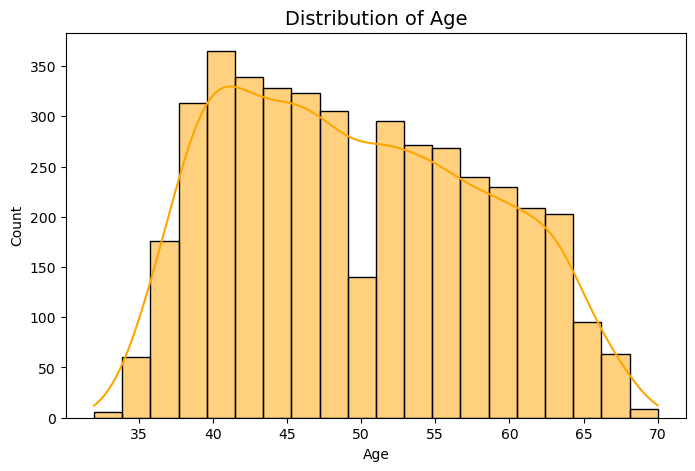

In [17]:
## Visualize distribution of age 

plt.figure(figsize=(8,5))
sns.histplot(heart_df['age'], kde=True, bins=20, color='orange')
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")  
plt.ylabel("Count")
plt.show()

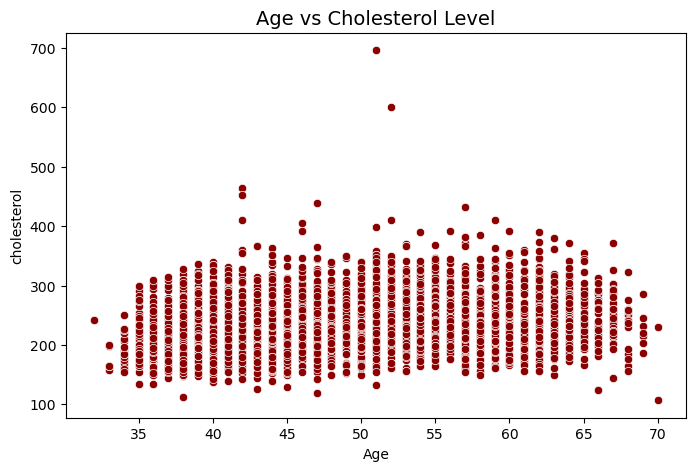

In [19]:
## Relationship visualization - scatter plot between age and cholesterol 

plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='totChol', data=heart_df, color='darkred')
plt.title("Age vs Cholesterol Level", fontsize=14)
plt.xlabel("Age")
plt.ylabel("cholesterol")
plt.show()

In [20]:
## Step 4 Data Cleaning 

#Check for nulls again to verify before cleaning
print("Null values before cleaning:\n", heart_df.isnull().sum())

Null values before cleaning:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [28]:
## Drop rows with nulls
heart_df_clean = heart_df.dropna()

In [29]:
heart_df_clean.shape

(3656, 16)

In [30]:
## Display Cleaned dataset info
print(heart_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB
None


In [31]:
## Save cleaned dataset as a new variable for modeling 
clean_data = heart_df_clean.copy()

In [32]:
## Step 5: Prepare features and target (use diabetes as the target)

# Separate independent variables (x) and dependent variables (y)
x = clean_data.drop('diabetes', axis=1) # all columns except for diabetes 
y = clean_data['diabetes'] # target column

# if there are categorical columns, convert them to dummy variables 
x = pd.get_dummies(x, drop_first=True)

# Display final features set shapes and sample 
print("n\Feature dataset shape:", x.shape)
print("Target variable shape:", y.shape) 
print("n\Sample of processed features:")
print(x.head())

n\Feature dataset shape: (3656, 15)
Target variable shape: (3656,)
n\Sample of processed features:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0             0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1             0    250.0  121.0   81.0  28.73       95.0     76.0           0  
2             0    245.0  127.5   80.0  25.34       75.0     70.0           0  
3             1    225.0  150.0   95.0  28.58       65.0    103.0           1  
4             0    285.0  

In [34]:
## Step 6: Split data into training and testing sets 

# Split dataset into 80% training and 20% testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Display shape of training and test sets
print("\nTraining set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)


Training set shape: (2924, 15)
Testing set shape: (732, 15)


In [35]:
## Step 7: Apply logistic regression model 

# Create logistic regression model 
log_reg = LogisticRegression(max_iter=1000) # increase max_iter to ensure convergence 

# Fit model using training data 
log_reg.fit(x_train, y_train)

# Predict outcomes of the test data 
y_pred = log_reg.predict(x_test)


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Accuracy: 99.18 %


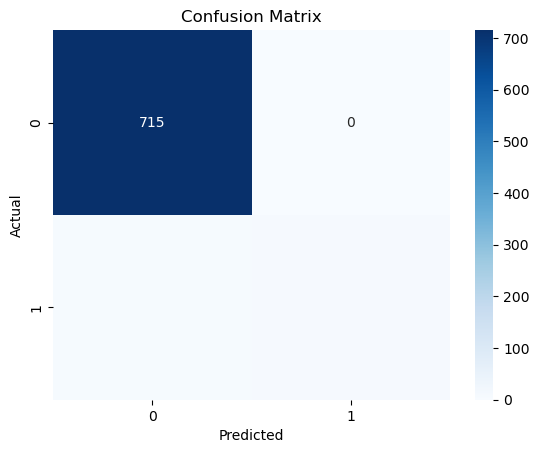


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       715
           1       1.00      0.65      0.79        17

    accuracy                           0.99       732
   macro avg       1.00      0.82      0.89       732
weighted avg       0.99      0.99      0.99       732



In [36]:
## Step 8: Evaluate the model performance

# Calculate the print model accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%")

# Display Confusion matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print the detailed classification report (precision, recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
## ROC / AUC 

from sklearn.metrics import roc_curve, roc_auc_score  # Fixed typo: 'matrics' -> 'metrics'
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_pred_prob = log_reg.predict_proba(x_test)[:,1]

# Compute ROC curve values 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Fixed typo: 'y_pred_prod' -> 'y_pred_prob'

# Compute AUC Score 
auc_score = roc_auc_score(y_test, y_pred_prob)
print("AUC Score:", round(auc_score, 3)) 

# Plot ROC Curve 
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc_score: 2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--') # random baseline 
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate (Recall)")
plt.title("Reciever Operating Characteristics (ROC) Curve")
plt.legend(loc="lower right")
plt.show()